# STEP 0: Use GPU

In [ ]:
# Make sure you use the Colab GPU to run the testing phase

import torch
torch.cuda.is_available()

In [ ]:
# Show the GPU info

!nvidia-smi

# STEP 1: Git clone your project

In [ ]:
# Git clone your project

!git clone https://github.com/ultralytics/yolov5

# STEP 2: Install your requirements

In [ ]:
# Install your requirments (torch, mmcv, ...)
# It is recommended that you wirte the requirements.txt file in your project.

# %cd mmdetection

# !pip install mmcv-full

# !pip install -e .

# !pip install googledrivedownloader

%cd /content/yolov5
!pip install -r /content/yolov5/requirements.txt
!pip install mmcv


In [ ]:
# Import your package and check the version

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

import mmdet
print(mmdet.__version__)

from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# You must import the below 5 packages 
import os
import cv2
import time
from tqdm import tqdm
from google_drive_downloader import GoogleDriveDownloader as gdd

# STEP 3: Wget testing data 

In [ ]:
# 1. Download the testing data

# gdd.download_file_from_google_drive(file_id='1Fm-avdeNgzhPxhvia0iw9yZzcoOggy7I',
#                                     dest_path='./test.zip',
#                                     unzip=True)

# 2. Read the image_name and put them into the list
# You need to modify the path to fit your test_folder
# data_listdir = os.listdir("/content/mmdetection/test")

!gdown --id '1qHKxm9GiwMqI8-yxqogVovdqSjq-2Ret' --output test.zip

#https://drive.google.com/file/d/1wXB_HJeFGJRtGJK-zurz6jEBAyhq0XlM/view?usp=sharing
#https://drive.google.com/file/d/1qHKxm9GiwMqI8-yxqogVovdqSjq-2Ret/view?usp=sharing


In [ ]:
#Download the model weights
!gdown --id 'dFj4zf9DcsjIWOl2Q09XG4vuzzd2TDXo' --output best.pt
#https://drive.google.com/file/d/1dFj4zf9DcsjIWOl2Q09XG4vuzzd2TDXo/view?usp=sharing


# STEP 4: Run inferene and bench mark

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

# 1. Load your model and weights
config = '/content/drive/MyDrive/NYCU/VRDL/HW2/VRDL_100_train_config.py'
checkpoint = "/content/drive/MyDrive/NYCU/VRDL/HW2/demo.pth"

# 2. Initialize the model
model = init_detector(config, checkpoint, device='cuda:0')


In [ ]:
# unzip testing data
!unzip test.zip -d test_images

### Please **screenshot** this cell, including the code and the output (your inference time), and put it into your report.

In [ ]:
# Test your inference time
TEST_IMAGE_NUMBER = 100 # This number is fixed.
test_img_list = []

# Read image (Be careful with the image order)
data_listdir.sort(key = lambda x: int(x[:-4]))
for img_name in data_listdir[:TEST_IMAGE_NUMBER]:
  img_path = os.path.join("/content/mmdetection/test", img_name)
  img = cv2.imread(img_path)
  test_img_list.append(img)

start_time = time.time()
for img in tqdm(test_img_list):
    # your model prediction
    pred = inference_detector(model, img)

end_time  = time.time()
print("\nInference time per image: ", (end_time - start_time) / len(test_img_list))

# Remember to screenshot!

In [ ]:

# inplemement
!python detect.py --source /content/test_images/test --weights /content/best.pt --conf 0.1

# STEP 5: Generate answer.json for submission on Codalab
The answer.json has the same format as [COCO dataset results](https://cocodataset.org/#format-results)

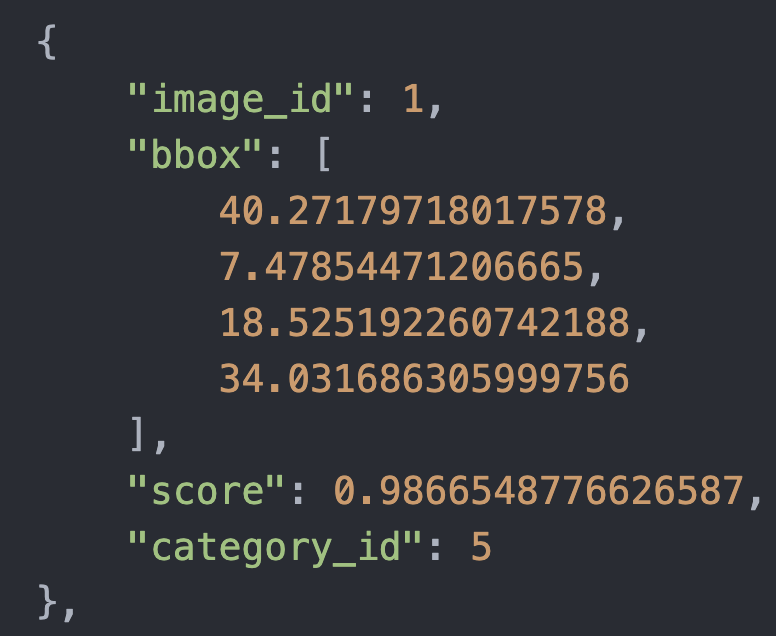

### Pseudo code for generating submission file


In [ ]:
# Use the results from your model to generate the output json file
data_listdir = os.listdir("test_image_dir/")
data_listdir.sort(key = lambda x: int(x[:-4]))
result_to_json = []

# for each test image
for img_name in data_listdir:
    # the image_name is as same as the image_id
    image_id = int(img_name[:-4])

    # add each detection box infomation into list
    your_model_detection_output[img_name] = all_det_boxes_in_this_image

    for det_box in all_det_boxes_in_this_image:
        det_box_info = {}

        # An integer to identify the image
        image_id = det_box_info["image_id"]
        
        # A list ( [left_x, top_y, width, height] )
        det_box["bbox"] = det_box_info["bbox"]
        
        # A float number between 0 ~ 1 which means the confidence of the bbox
        det_box["score"] = det_box_info["score"]
        
        # An integer which means the label class
        det_box["category_id"] = det_box_info["category_id"]
        
        result_to_json.append(det_box_info)

# Write the list to answer.json 
json_object = json.dumps(result_to_json, indent=4)

with open("answer.json", "w") as outfile:
    outfile.write(json_object)


# STEP 6: Share this notebook link on your GitHub/GitLab Readme.MD
Click the share on the right top buttom 